In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('./data.csv',  index_col=None)

def indexify(x):

    seq = sorted(x, reverse = True)
    index = [seq.index(v)+1 for v in x]
    return index


In [2]:
data

,Unnamed: 0,Elec-SR,VdW-SR,Elec-LR,VdW-LR,sum_E,Expt_Kd
0,wild-Nd/Ang,-8783.4075,113.85120,815.6950,40.4315,-7813.42980,4070.0
1,wild-Nd/Li,-10190.4975,211.07550,797.1550,40.8267,-9141.44030,4070.0
2,D9H-Nd/Ang,-8555.1525,103.51035,831.6200,36.9790,-7583.04315,2150.0
3,D9H-Nd/Li,-9955.3475,178.12800,843.9525,36.8072,-8896.45980,2150.0
4,D9M-Nd/Ang,-8370.8500,113.48700,800.3425,39.2800,-7417.74050,1460.0
5,D9M-Nd/Li,-9660.9450,157.55010,798.4400,39.4845,-8665.47040,1460.0
6,D9A-Nd/Li,-10006.6200,221.09000,799.1525,37.6500,-8948.72750,397.0
7,D9A-Nd/Ang,-8364.8200,121.33250,808.6175,39.6900,-7395.18000,397.0
8,D9N-Nd/Ang,-8475.0350,115.78800,725.9150,40.3900,-7592.94200,53.1
9,D9N-Nd/LI,-9809.4650,164.27420,732.1500,40.4640,-8872.57680,53.1


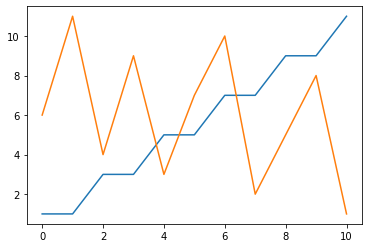

In [3]:
import matplotlib.pyplot as plt 

y1 = indexify(data['Expt_Kd'])
y2 = indexify(data['sum_E'])

x = np.arange(len(y1))


plt.plot(x,y1)
plt.plot(x,y2)

In [4]:
kd_rank = indexify(list(data['Expt_Kd']))
print(kd_rank)

[1, 1, 3, 3, 5, 5, 7, 7, 9, 9, 11]


In [5]:
weights = np.array([1,1,1,1])
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])
data_4

array([[ -8783.4075 ,    113.8512 ,    815.695  ,     40.4315 ],
       [-10190.4975 ,    211.0755 ,    797.155  ,     40.8267 ],
       [ -8555.1525 ,    103.51035,    831.62   ,     36.979  ],
       [ -9955.3475 ,    178.128  ,    843.9525 ,     36.8072 ],
       [ -8370.85   ,    113.487  ,    800.3425 ,     39.28   ],
       [ -9660.945  ,    157.5501 ,    798.44   ,     39.4845 ],
       [-10006.62   ,    221.09   ,    799.1525 ,     37.65   ],
       [ -8364.82   ,    121.3325 ,    808.6175 ,     39.69   ],
       [ -8475.035  ,    115.788  ,    725.915  ,     40.39   ],
       [ -9809.465  ,    164.2742 ,    732.15   ,     40.464  ],
       [ -6427.9075 ,    -82.8812 ,    801.5275 ,     42.1087 ]])

In [6]:
list_ = indexify(data['sum_E'])

print(list_)

[6, 11, 4, 9, 3, 7, 10, 2, 5, 8, 1]


In [7]:
def sum_calc_easy(weights, kd_rank, data_4):
    list_ = []
    for i in range(data_4.shape[0]):
        list_.append(np.sum(data_4[i]*weights))

    list_ = indexify(np.array(list_))



    return np.corrcoef(np.array(list_),np.array(kd_rank))[1][0]

In [8]:
frac = np.linspace(.001,1,20)
mult = np.linspace(2,200,20)
frac_mult = np.concatenate((frac,mult), axis = 0)
frac_mult

array([1.00000000e-03, 5.35789474e-02, 1.06157895e-01, 1.58736842e-01,
       2.11315789e-01, 2.63894737e-01, 3.16473684e-01, 3.69052632e-01,
       4.21631579e-01, 4.74210526e-01, 5.26789474e-01, 5.79368421e-01,
       6.31947368e-01, 6.84526316e-01, 7.37105263e-01, 7.89684211e-01,
       8.42263158e-01, 8.94842105e-01, 9.47421053e-01, 1.00000000e+00,
       2.00000000e+00, 1.24210526e+01, 2.28421053e+01, 3.32631579e+01,
       4.36842105e+01, 5.41052632e+01, 6.45263158e+01, 7.49473684e+01,
       8.53684211e+01, 9.57894737e+01, 1.06210526e+02, 1.16631579e+02,
       1.27052632e+02, 1.37473684e+02, 1.47894737e+02, 1.58315789e+02,
       1.68736842e+02, 1.79157895e+02, 1.89578947e+02, 2.00000000e+02])

In [9]:
dict_ = {}
counter = 0
for i in frac_mult:
    for j in frac_mult:
        for k in frac_mult:
            for l in frac_mult:
                inside_dict = {}
                inside_dict['w1'] = i
                inside_dict['w2'] = j
                inside_dict['w3'] = k
                inside_dict['w4'] = l 
                
                sum_ = sum_calc_easy(np.array([i,j,k,l]), kd_rank, data_4)
                inside_dict['sum'] = sum_
                dict_[counter] = inside_dict
                counter+=1

In [ ]:
# import pickle

# with open('weights_n_pearson.pkl', 'wb') as fp:
#     pickle.dump(dict_, fp)
#     print('dictionary saved successfully to file')

In [10]:
main_data = pd.DataFrame(dict_).transpose().sort_values(by = 'sum')
main_data

,w1,w2,w3,w4,sum
588836,0.474211,0.421632,0.001000,168.736842,-0.574737
460872,0.369053,0.421632,0.053579,127.052632,-0.574737
720039,0.579368,0.526789,0.001000,200.000000,-0.574737
659237,0.526789,0.631947,0.001000,179.157895,-0.574737
587276,0.474211,0.369053,0.053579,168.736842,-0.574737
...,...,...,...,...,...
8821,0.001000,0.263895,2.000000,12.421053,0.862105
7221,0.001000,0.211316,2.000000,12.421053,0.862105
32911,0.001000,2.000000,22.842105,116.631579,0.862105
7181,0.001000,0.211316,1.000000,12.421053,0.862105


In [ ]:
# main_data.to_csv('weights_nd_pearson.csv', sep=',', index=False, encoding='utf-8')

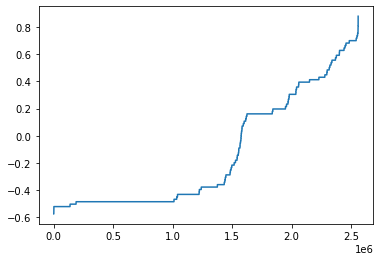

In [11]:
import matplotlib.pyplot as plt
plt.plot([x+1 for x in range(len(main_data['sum']))], main_data['sum'])

In [ ]:
np.array(main_data)[-1]

In [12]:
weights = np.array(main_data)[-1][:-1]
weights

array([5.35789474e-02, 2.00000000e+00, 1.24210526e+01, 8.53684211e+01])

In [52]:
import pandas as pd 
import numpy as np

# weights = np.array(main_data)[-1][:-1]


# weights_nd_pearson = pd.read_csv('./weights_nd_pearson.csv',  index_col=None)
weights_nd_pearson

,w1,w2,w3,w4,sum
0,0.579368,20.000000,12.000000,28.0,-0.644004
1,0.947421,34.000000,20.000000,42.0,-0.644004
2,0.947421,36.000000,20.000000,36.0,-0.644004
3,0.684526,26.000000,14.000000,24.0,-0.644004
4,0.842263,32.000000,18.000000,32.0,-0.644004
...,...,...,...,...,...
4100620,0.369053,0.211316,0.106158,6.0,0.314093
4100621,0.369053,0.211316,0.158737,6.0,0.314093
4100622,0.894842,0.631947,0.369053,14.0,0.314093
4100623,2.000000,0.106158,0.947421,34.0,0.314093


In [17]:
data

,Unnamed: 0,Elec-SR,VdW-SR,Elec-LR,VdW-LR,sum_E,Expt_Kd
0,wild-Nd/Ang,-8783.4075,113.85120,815.6950,40.4315,-7813.42980,4070.0
1,wild-Nd/Li,-10190.4975,211.07550,797.1550,40.8267,-9141.44030,4070.0
2,D9H-Nd/Ang,-8555.1525,103.51035,831.6200,36.9790,-7583.04315,2150.0
3,D9H-Nd/Li,-9955.3475,178.12800,843.9525,36.8072,-8896.45980,2150.0
4,D9M-Nd/Ang,-8370.8500,113.48700,800.3425,39.2800,-7417.74050,1460.0
5,D9M-Nd/Li,-9660.9450,157.55010,798.4400,39.4845,-8665.47040,1460.0
6,D9A-Nd/Li,-10006.6200,221.09000,799.1525,37.6500,-8948.72750,397.0
7,D9A-Nd/Ang,-8364.8200,121.33250,808.6175,39.6900,-7395.18000,397.0
8,D9N-Nd/Ang,-8475.0350,115.78800,725.9150,40.3900,-7592.94200,53.1
9,D9N-Nd/LI,-9809.4650,164.27420,732.1500,40.4640,-8872.57680,53.1


In [ ]:
# weights = np.array(weights_nd_pearson)[-1][:-1]
# weights

In [ ]:
data

In [13]:
system = {}
energies = {}
kd = {}



for i in np.array(data):

    a = {}
    energies = i[1:-2]
    a['energy'] = energies
    a['kd'] = i[-2]
    a['sum'] = sum(energies)
    weighted_energy = np.multiply(np.array(energies),np.array(weights))
    a['weighted_energy'] = weighted_energy
    sum_weighted_energy = np.sum(np.multiply(np.array(energies),np.array(weights)))
    a['weighted_sum'] = sum_weighted_energy
    a['frac_contribution'] = weighted_energy/sum_weighted_energy

    system[i[0]] = a


In [14]:
def indexify(x):

    seq = sorted(x, reverse = True)
    index = [seq.index(v)+1 for v in x]
    return index

In [18]:
system.keys()

dict_keys(['wild-Nd/Ang', 'wild-Nd/Li', 'D9H-Nd/Ang', 'D9H-Nd/Li', 'D9M-Nd/Ang', 'D9M-Nd/Li', 'D9A-Nd/Li', 'D9A-Nd/Ang', 'D9N-Nd/Ang', 'D9N-Nd/LI', 'wild-Ca'])

In [20]:
kd_list = indexify(data['Expt_Kd'])
sum_E = indexify([system[i]['sum'] for i in system.keys()])
sum_wE = indexify([system[i]['weighted_sum'] for i in system.keys()])
indx = list(system.keys())

rank_weighted = {}
rank_weighted['index'] = indx
rank_weighted['kd_list'] = kd_list 
rank_weighted['sum_E'] = sum_E
rank_weighted['sum_wE'] = sum_wE



rank_weighted = pd.DataFrame(rank_weighted).sort_values(by = 'kd_list')

In [21]:
rank_weighted

,index,kd_list,sum_E,sum_wE
0,wild-Nd/Ang,1,6,2
1,wild-Nd/Li,1,11,3
2,D9H-Nd/Ang,3,4,4
3,D9H-Nd/Li,3,9,1
4,D9M-Nd/Ang,5,3,7
5,D9M-Nd/Li,5,7,6
6,D9A-Nd/Li,7,10,8
7,D9A-Nd/Ang,7,2,5
8,D9N-Nd/Ang,9,5,11
9,D9N-Nd/LI,9,8,10


In [22]:
print(kd_rank)

print(sum_wE)
print(np.corrcoef(kd_list,sum_wE)[1][0])

print('----------------------')


print(kd_list)
print(sum_E)
print(np.corrcoef(kd_list,sum_E)[1][0])

[1, 1, 3, 3, 5, 5, 7, 7, 9, 9, 11]
[2, 3, 4, 1, 7, 6, 8, 5, 11, 10, 9]
0.8800659799311968
----------------------
[1, 1, 3, 3, 5, 5, 7, 7, 9, 9, 11]
[6, 11, 4, 9, 3, 7, 10, 2, 5, 8, 1]
-0.43105272486425983


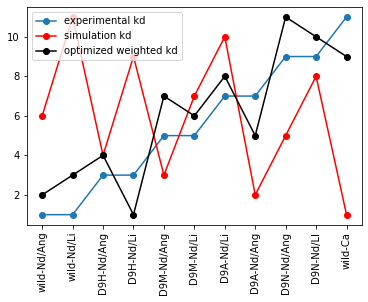

In [25]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(rank_weighted['kd_list']))]

plt.plot(x,rank_weighted['kd_list'], marker = 'o')
plt.plot(x,rank_weighted['sum_E'],color = 'r', marker = 'o')
plt.plot(x,rank_weighted['sum_wE'],color = 'k', marker = 'o')
plt.xticks(x,list(system.keys()),rotation = 90)

plt.legend(['experimental kd','simulation kd', 'optimized weighted kd'])


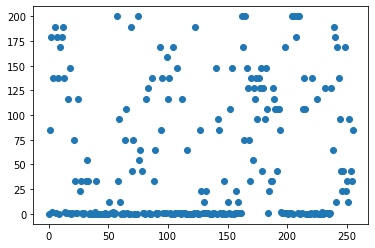

In [32]:
y = main_data['w2'][0::10000]
x = np.arange(len(y))
plt.scatter(x,y)

In [30]:
top_cands = main_data[main_data['sum'] > 0.82]#[main_data['w1'] > 1]
top_cands

,w1,w2,w3,w4,sum
482553,0.369053,12.421053,33.263158,137.473684,0.826184
290595,0.211316,12.421053,43.684211,158.315789,0.826184
226596,0.158737,12.421053,43.684211,168.736842,0.826184
226595,0.158737,12.421053,43.684211,158.315789,0.826184
354597,0.263895,12.421053,43.684211,179.157895,0.826184
...,...,...,...,...,...
8821,0.001000,0.263895,2.000000,12.421053,0.862105
7221,0.001000,0.211316,2.000000,12.421053,0.862105
32911,0.001000,2.000000,22.842105,116.631579,0.862105
7181,0.001000,0.211316,1.000000,12.421053,0.862105


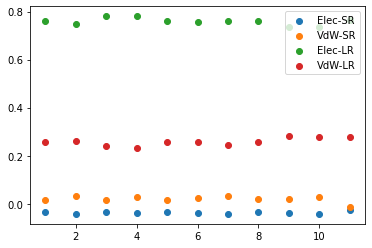

In [26]:
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])

frac_es = [system[i]['frac_contribution'][0] for i in system.keys()]
frac_vs = [system[i]['frac_contribution'][1] for i in system.keys()]
frac_el = [system[i]['frac_contribution'][2] for i in system.keys()]
frac_vl = [system[i]['frac_contribution'][3] for i in system.keys()]
x_frac = [i+1 for i in range(len(frac_es))]


plt.scatter(x_frac,frac_es)
plt.scatter(x_frac,frac_vs)
plt.scatter(x_frac,frac_el)
plt.scatter(x_frac,frac_vl)
# plt.xticks(x,list(data['System']),rotation = 90)
plt.legend(["Elec-SR","VdW-SR","Elec-LR","VdW-LR"])

c:\Users\15156\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Users\15156\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\15156\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and

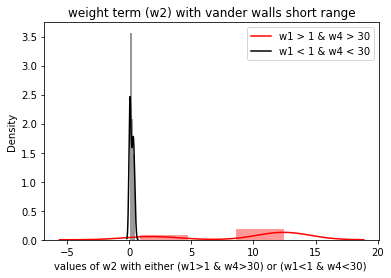

In [38]:
import seaborn as sns

y1 = top_cands['w2'][top_cands['w1'] > 1][top_cands['w4'] > 30]
y2 = top_cands['w2'][top_cands['w1'] <= 1][top_cands['w4'] > 30]
y3 = top_cands['w2'][top_cands['w1'] > 1][top_cands['w4'] < 30]
y4 = top_cands['w2'][top_cands['w1'] <= 1][top_cands['w4'] < 30]


x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))
x4 = np.arange(len(y4))


# plt.ylim([0,2])
# plt.xlim([0,145])


# plt.scatter(x1,y1,color = 'b')
# plt.scatter(x2,y2,color='r')
# plt.scatter(x3,y3,color ='g')
# plt.scatter(x4,y4, color = 'k')
sns.distplot(y1,color = 'b')
sns.distplot(y2,color='r')
sns.distplot(y3,color ='g')
sns.distplot(y4, color = 'k')


plt.title('weight term (w2) with vander walls short range')
plt.xlabel('values of w2 with either (w1>1 & w4>30) or (w1<1 & w4<30) ')
plt.legend(['w1 > 1 & w4 > 30','w1 < 1 & w4 < 30'])

In [41]:
y1

Series([], Name: w2, dtype: float64)

Text(0.5, 1.0, 'weight term with electrostatic long range')

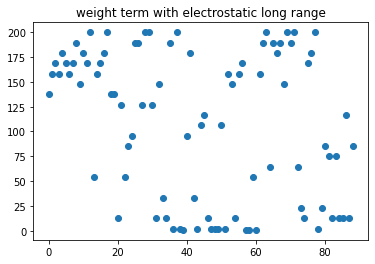

In [37]:
y = top_cands['w4']
x = np.arange(len(y))

plt.scatter(x,y)
plt.title('weight term with electrostatic long range')